# Import Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and Preprocess the MNIST Dataset

In [ ]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize images to the range [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Flatten images to 1D arrays
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


# Define the Neural Network Model

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        # Forward pass
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.softmax(self.Z2)
        return self.A2

    def relu(self, Z):
        # ReLU activation function
        return np.maximum(0, Z)

    def softmax(self, Z):
        # Softmax activation function
        expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return expZ / np.sum(expZ, axis=1, keepdims=True)

    #Backward Propogation
    def backward(self, X, Y, learning_rate):
        # Backward pass
        m = X.shape[0]
        dZ2 = self.A2 - Y
        dW2 = (1/m) * np.dot(self.A1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * (self.Z1 > 0)
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

        # Update weights
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

# Train the Model

In [ ]:
def train_model(model, X_train, Y_train, epochs, learning_rate):
    loss_history = []
    for epoch in range(epochs):
        # Forward pass
        output = model.forward(X_train)
        # Compute loss (categorical cross-entropy)
        loss = -np.mean(np.sum(Y_train * np.log(output + 1e-8), axis=1))
        loss_history.append(loss)
        # Backward pass
        model.backward(X_train, Y_train, learning_rate)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}')
    return loss_history

# Initialize the model
input_size = 784
hidden_size = 128
output_size = 10
model = NeuralNetwork(input_size, hidden_size, output_size)

# Train the model
epochs = 100
learning_rate = 0.1
loss_history = train_model(model, train_images, train_labels, epochs, learning_rate)

Epoch 1/100, Loss: 2.3036
Epoch 2/100, Loss: 2.3025
Epoch 3/100, Loss: 2.3014
Epoch 4/100, Loss: 2.3003
Epoch 5/100, Loss: 2.2992
Epoch 6/100, Loss: 2.2981
Epoch 7/100, Loss: 2.2969
Epoch 8/100, Loss: 2.2957
Epoch 9/100, Loss: 2.2944
Epoch 10/100, Loss: 2.2930
Epoch 11/100, Loss: 2.2916
Epoch 12/100, Loss: 2.2901
Epoch 13/100, Loss: 2.2885
Epoch 14/100, Loss: 2.2868
Epoch 15/100, Loss: 2.2850
Epoch 16/100, Loss: 2.2830
Epoch 17/100, Loss: 2.2809
Epoch 18/100, Loss: 2.2787
Epoch 19/100, Loss: 2.2762
Epoch 20/100, Loss: 2.2736
Epoch 21/100, Loss: 2.2709
Epoch 22/100, Loss: 2.2678
Epoch 23/100, Loss: 2.2646
Epoch 24/100, Loss: 2.2611
Epoch 25/100, Loss: 2.2574
Epoch 26/100, Loss: 2.2533
Epoch 27/100, Loss: 2.2490
Epoch 28/100, Loss: 2.2443
Epoch 29/100, Loss: 2.2393
Epoch 30/100, Loss: 2.2339
Epoch 31/100, Loss: 2.2281
Epoch 32/100, Loss: 2.2219
Epoch 33/100, Loss: 2.2152
Epoch 34/100, Loss: 2.2080
Epoch 35/100, Loss: 2.2004
Epoch 36/100, Loss: 2.1922
Epoch 37/100, Loss: 2.1834
Epoch 38/1

# Visualize the Loss

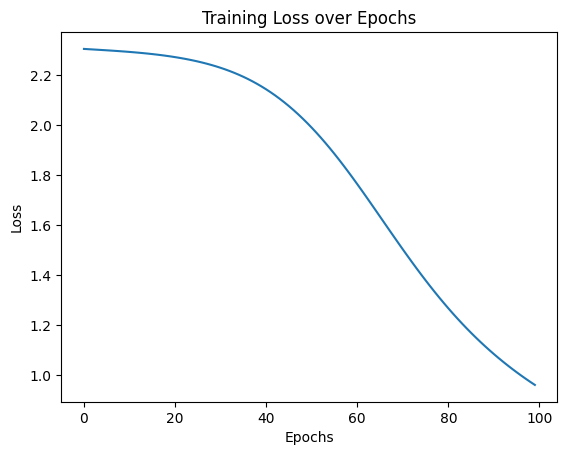

In [ ]:
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

# Evaluate Model

In [ ]:
def evaluate_model(model, X_test, Y_test):
    output = model.forward(X_test)
    predictions = np.argmax(output, axis=1)
    labels = np.argmax(Y_test, axis=1)
    accuracy = np.mean(predictions == labels)
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

evaluate_model(model, test_images, test_labels)

Test Accuracy: 79.15%
